<a href="https://colab.research.google.com/github/txrds/driver_hydra/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/competitions/titanic

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


In [3]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [113]:
train_df = pd.read_csv('/content/drive/MyDrive/Projetos/Titanic/titanic/train.csv')

In [114]:
test_df = pd.read_csv('/content/drive/MyDrive/Projetos/Titanic/titanic/test.csv')

In [84]:
train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,3
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,3
4,0,3,1,35.0,0,0,8.0500,2


## Análise

### Dados Estatisticos

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [18]:
train_df.describe()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [26]:
moda_age = train_df['Age'].mode()[0]
media_age = train_df['Age'].mean()
mediana_age = train_df['Age'].median()

In [27]:
mediana_age

28.0

In [28]:
# Contar o número de sobreviventes e não sobreviventes
print(train_df['Survived'].value_counts())

# Para obter a proporção
print(train_df['Survived'].value_counts(normalize=True))

Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


### Analise e correlação entre 'Pcass' e sobreviventes

In [ ]:
# Taxa de sobrevivência por classe
survival_rate_by_class = train_df.groupby('Pclass')['Survived'].mean()
print(survival_rate_by_class)


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [ ]:
# Contagem de sobreviventes e não sobreviventes por classe
survivors_by_class = train_df.groupby('Pclass')['Survived'].value_counts().unstack()
print(survivors_by_class)


Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


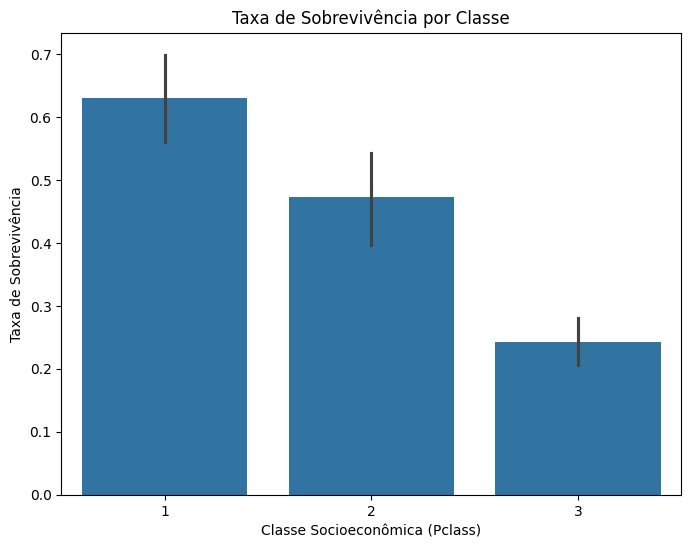

In [ ]:
# Gráfico de barras para sobrevivência por classe
plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Taxa de Sobrevivência por Classe')
plt.ylabel('Taxa de Sobrevivência')
plt.xlabel('Classe Socioeconômica (Pclass)')
plt.show()


In [ ]:
# Analisar sobrevivência por classe e sexo
print(train_df.pivot_table('Survived', index='Pclass', columns='Sex', aggfunc='mean'))


Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


### Analise e correlacionamento dos titulos dos nomes com sobreviventes

In [52]:
# Contagem dos títulos
print(train_df['Title'].value_counts())

Title
2    517
1    186
3    125
0     40
5     18
4      4
6      1
Name: count, dtype: int64


In [ ]:
# Taxa de sobrevivência por título
survival_by_title = train_df.groupby('Title')['Survived'].mean()
print(survival_by_title)

Title
Master      0.575000
Miss        0.704301
Mr          0.156673
Mrs         0.792000
Nobility    0.500000
Officer     0.277778
Name: Survived, dtype: float64


In [ ]:
# Taxa de sobrevivência por título
survival_by_title = train_df.groupby('Title')['Survived'].sum()
print(survival_by_title)

Title
Master       23
Miss        131
Mr           81
Mrs          99
Nobility      2
Officer       5
Name: Survived, dtype: int64


In [ ]:
total_survivors = train_df['Survived'].sum()
total_survivors

342

### Correlação entre 'Embarked' e 'Suvived'

In [ ]:
# Criar uma tabela de contingência entre 'Embarked' e 'Survived'
contingency_table = pd.crosstab(train_df['Embarked'], train_df['Survived'])
contingency_table

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [ ]:
# Calcular a taxa de sobrevivência média por local de embarque
survival_rate = train_df.groupby('Embarked')['Survived'].mean()
survival_rate

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [29]:
# Codificar a coluna 'Embarked' em valores numéricos
labelencoder = LabelEncoder()
train_df['Embarked_Num'] = labelencoder.fit_transform(train_df['Embarked'])

# Calcular a correlação de Pearson entre 'Embarked_Num' e 'Survived'
correlation = train_df['Embarked_Num'].corr(train_df['Survived'])

A correlação negativa fraca de -0.1635 indica que o local de embarque tem uma pequena influência na probabilidade de sobrevivência, mas não é um fator muito significativo por si só.
Isso sugere que, embora haja uma leve diminuição nas chances de sobrevivência para passageiros de certos portos, você precisaria explorar mais profundamente outros fatores no conjunto de dados para obter insights mais relevantes.

In [30]:
correlation

-0.1635166514250989

## Tratamento e limpeza dos dados


In [73]:
# Extarindo "Mr.", "Miss.", "Dr." dos nomes
def extrair_titulo(df, nome_coluna):
  try:
    df['Title'] = df[nome_coluna].str.extract(r',\s*([A-Za-z]+)\.', expand=False)
    print("Títulos extraídos com sucesso.")
  except KeyError as e:
    print(f"Erro: A coluna '{nome_coluna}' não foi encontrada no DataFrame. Detalhes: {e}")
  return df

In [74]:
#Agrupar titulos
def group_title(df):
  try:
    train_df['Title'] = train_df['Title'].replace(['Mlle','Ms','Mme','Mis'], 'Miss')
    train_df['Title'] = train_df['Title'].replace(['Capt','Col','Major','Dr','Rev'], 'Officer')
    train_df['Title'] = train_df['Title'].replace(['Countess','Lady','Sir','Jonkheer','Don'], 'Nobility')
    print("Títulos agrupados com sucesso.")
  except KeyError as e:
    print(f"Erro: A coluna 'Title' não foi encontrada no DataFrame. Detalhes: {e}")
  return df

In [115]:
extrair_titulo(train_df, 'Name')
group_title(train_df)

Títulos extraídos com sucesso.
Títulos agrupados com sucesso.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Officer
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [116]:
extrair_titulo(test_df, 'Name')
group_title(test_df)

Títulos extraídos com sucesso.
Títulos agrupados com sucesso.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [117]:
# Convertendo str para num na coluna 'Sex'
labelencoder = LabelEncoder()
train_df['Sex'] = labelencoder.fit_transform(train_df['Sex'])
test_df['Sex'] = labelencoder.fit_transform(test_df['Sex'])
train_df['Title'] = labelencoder.fit_transform(train_df['Title'])
test_df['Title'] = labelencoder.fit_transform(test_df['Title'])

In [118]:
# Completando numeros faltande com a mediana
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

<ipython-input-118-6b28fb13e87b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)


In [121]:
def remove_colunas(df, colunas):
  try:
    df = df.drop(colunas, axis=1)
    print("Colunas removidas com sucesso!")
  except KeyError as e:
    print("Erro ao remover colunas!")
  return df


In [122]:
colunas_a_remover = [ 'Name', 'Ticket', 'Cabin','Embarked']
train_df = remove_colunas(train_df, colunas_a_remover)


Erro ao remover colunas!


In [123]:
colunas_a_remover_test = ['Name', 'Ticket', 'Cabin','Embarked']
test_df = remove_colunas(test_df, colunas_a_remover_test)

Colunas removidas com sucesso!


## Dados Desbalanciados

### Separe as features (X) e a variável-alvo (y):
A variável y será a coluna Survived, e as features (X) serão as outras colunas que você deseja usar como entrada para o modelo. Aqui, vou excluir algumas colunas irrelevantes (como PassengerId, Name, Ticket, Cabin), mas você pode escolher conforme seu modelo.

O SMOTE funciona apenas com dados numéricos, então, se houver colunas categóricas como Sex e Embarked, você precisará codificá-las (por exemplo, usando pd.get_dummies() ou LabelEncoder).

In [124]:
# Definindo X (features) e y (variável alvo)
X = train_df[['PassengerId','Pclass',	'Sex',	'Age',	'SibSp',	'Parch',	'Fare',	'Title']]
y = train_df['Survived']

In [125]:
# Aplicando o SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

## OneHotEncoding

## Arvore de Decisão

In [126]:
# Dividir os dados balanceados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Criar o classificador de árvore de decisão
clf = DecisionTreeClassifier(random_state=42)

# Treinar o modelo nos dados balanceados
clf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Acurácia: 0.7818181818181819
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       103
           1       0.79      0.79      0.79       117

    accuracy                           0.78       220
   macro avg       0.78      0.78      0.78       220
weighted avg       0.78      0.78      0.78       220

[[79 24]
 [24 93]]


##Florestas Aleatórias (Random Forest)

In [62]:
# Dividir os dados balanceados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)

# Treinar o modelo nos dados balanceados
clf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.8181818181818182
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       103
           1       0.81      0.85      0.83       117

    accuracy                           0.82       220
   macro avg       0.82      0.82      0.82       220
weighted avg       0.82      0.82      0.82       220

[[ 80  23]
 [ 17 100]]


## Entrega

In [127]:
# Fazer previsões no conjunto de teste do Kaggle
y_pred_kaggle = clf.predict(test_df)

# Criar o DataFrame de submissão
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred_kaggle
})

# Salvar o arquivo CSV para submissão
submission.to_csv('submission.csv', index=False)

In [96]:
test_df.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,892,3,1,34.5,0,0,7.8292,5
1,893,3,0,47.0,1,0,7.0000,6
2,894,2,1,62.0,0,0,9.6875,5
3,895,3,1,27.0,0,0,8.6625,5
4,896,3,0,22.0,1,1,12.2875,6
